In [1]:
import pandas as pd
import numpy as np
from configs.config_classifiers import config_FNN
from utils import obtain_pvis, obtain_perfo

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

## KDD results

In [ ]:
family_representatives_kdd = {}
rep = 'h4'
for model in config_FNN.keys():
    if any([x in model for x in ['leaky_relu', 'tanh']]): continue
    if rep in model:
        if model==rep:
            family_representatives_kdd['linear']=model
        else:
            family_representatives_kdd[model.replace(f"{rep}_","")] = model

models_per_family_kdd = {
    'linear': ['h1','h4'],
    'relu': ['h1_relu','h4_relu'],
    'sigmoid': ['h1_sigmoid','h4_sigmoid'],
    'gelu': ['h1_gelu','h4_gelu']
}

dict_label_kdd = {
    '<50k': 1,
    '>50k': 0,
}

dict_sensitive_kdd = {
    'Masc': 0 ,
    'Fem': 1,
}

label_kdd = 'class'
sensitive_kdd = 'sex'
disadv_kdd = "Fem"

In [ ]:
pvis_kdd = obtain_pvis(
                    base_path_to_pvis=f"/path/to/results/census_income_kdd/",
                    family_representatives = family_representatives_kdd,
                    dict_label = dict_label_kdd,
                    label = "class",
                    sensitive = "sex",
                    disadv = dict_sensitive_kdd['Fem'],
                    sensitive_too = False
                )

metrics_kdd = obtain_perfo(
                        base_path_to_pvis=f"/path/to/results/census_income_kdd/",
                        models_per_family = models_per_family_kdd,
                        dict_label = dict_label_kdd,
                        label = "class",
                        sensitive = "sex",
                        disadv = dict_sensitive_kdd['Fem']
                )

## FACET results

In [ ]:
# Obtaining family representatives
family_representatives_facet = {
    'inception': 'inception_v3',
    'resnet': 'resnet152',
    'mobilenet': 'mobilenet_v3_large',
    'vit': 'ViT_16'
}

models_per_family_facet = {
    'inception': ['googlenet','inception_v3'],
    'resnet': ['resnet18','resnet152'],
    'mobilenet': ['mobilenet_v3_small','mobilenet_v3_large'],
    'vit': ['ViT_16', 'ViT_32']
}

dict_label_facet = {
    "lawman": 27,
    "nurse": 31,
    }

# Define variables
label_facet = 'class1'
sensitive_facet = 'gender_presentation_masc' # in the processing, I set 1 to label=0 in this feature, therefore, 1 it's the disadv
disadv_facet = 1

In [ ]:
pvis_facet = {}
metrics_facet = {}


pvis_facet = obtain_pvis(
                    base_path_to_pvis=f"/path/to/results/facet/",
                    family_representatives = family_representatives_facet,
                    dict_label = dict_label_facet,
                    label = label_facet,
                    sensitive = sensitive_facet,
                    disadv = 1,
                    set_cal='set'
                )
metrics_facet = obtain_perfo(
                    base_path_to_pvis=f"/path/to/results/facet/",
                    models_per_family = models_per_family_facet,
                    dict_label = dict_label_facet,
                    label = label_facet,
                    sensitive = sensitive_facet,
                    disadv = 1,
                    set_cal='set'
                    )


## HATE SPEECH results

In [ ]:
family_representatives_hs = {
    'bert': 'bert-large-cased',
    'gpt2': 'gpt2-large',
    'bart': 'facebook/bart-large',
    'deberta': 'microsoft/deberta-v3-large',
}

models_per_family_hs = {
    'bert': ['bert-base-cased', 'bert-large-cased'],
    'gpt2': ['gpt2', 'gpt2-large',],
    'bart': ['facebook/bart-base','facebook/bart-large'],
    'deberta': ['microsoft/deberta-v3-base', 'microsoft/deberta-v3-large']
}


dict_label_hs = {
        'hate_speech': 0,
        'offensive_language': 1,
        'neither': 2
    }

dict_label_hs_together = {
        'harrasement': 'less_than_1',
        'neither': 2
    }

# Define variables
label_hs = 'class_label'
sensitive_hs = 'dialect_class'
disadv_hs = 'aa'

In [ ]:
pvis_hs = obtain_pvis(
                    base_path_to_pvis=f"/datasets/CS678/jvasqu6/info_bias_meter/hate_speech/",
                    family_representatives = family_representatives_hs,
                    dict_label = dict_label_hs,
                    label = label_hs,
                    sensitive = sensitive_hs,
                    disadv = 'aa'
                )

metrics_hs = obtain_perfo(
                    base_path_to_pvis=f"/datasets/CS678/jvasqu6/info_bias_meter/hate_speech/",
                    models_per_family = models_per_family_hs,
                    dict_label = dict_label_hs,
                    label = label_hs,
                    sensitive = sensitive_hs,
                    disadv = 'aa'
                )

# Charts

In [9]:
#Basics
pvis = {
    'kdd': pvis_kdd,
    'facet': pvis_facet,
    'hs': pvis_hs
}

metrics = {
    'kdd': metrics_kdd,
    'facet': metrics_facet,
    'hs': metrics_hs
}

families = {
    'kdd': family_representatives_kdd,
    'facet': family_representatives_facet,
    'hs': family_representatives_hs
}

labels = {
    'kdd': 'class',
    'facet': 'class1',
    'hs': 'class_label'
}

markers = {
    0: 'o',
    1: '^',
    2: 'v',
    3: '*',
    4: 'X',
    5: '.'
}

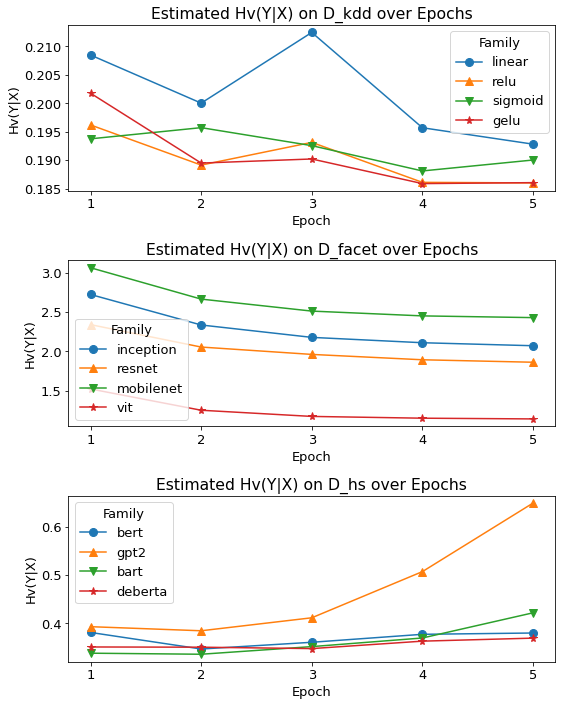

In [12]:
plt.rcParams.update({'font.size': 13})

# Create a figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

real_count=0
for i, p in enumerate(pvis):
    pvi_retrieved = pvis[p]
    family_retrieved = families[p]
    label_retrieved = labels[p]

    for e, family in enumerate(family_retrieved):
        
        family_data = pvi_retrieved[pvi_retrieved['family'] == family]
        
        # Plot the data on the first subplot
        axes[i].plot(family_data['epoch'].astype(str).to_list(), 
                    family_data[f'Ev_{label_retrieved}_test'].to_list(),
                    marker=markers[e], markersize=8, label=family)
        real_count +=1

    # Add title and labels to the first subplot
    axes[i].set_title(f'Estimated Hv(Y|X) on D_{p} over Epochs')
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel(f'Hv(Y|X)')
    axes[i].legend(title='Family')
    # axes[i].ticklabel_format(useOffset=False, style='plain', axis='x')
plt.tight_layout()
plt.savefig('Hv_epochs.pdf')

Obtain results for plotting

In [13]:
def generate_results(family_representatives, models_per_family, pvis, metrics, label, class_):
    columns = {
        'family': [],
        'epoch': [],
        f'metric':  [],
        f'metric_class': [],
        f'ratio': [],
        f'ratio_class': [],
        f'demp_test': [],
        f'eqopp_test': [],
        f'eqodd_test': [],
    }

    for f in family_representatives:
        columns['family'] += [f]
        
        filtered_pvis = pvis[pvis['family'] == f]

        epoch = filtered_pvis[filtered_pvis[f'Ev_{label}_val']==filtered_pvis[f'Ev_{label}_val'].min()]['epoch'].values[0]
        
        columns['epoch'] += [epoch]
        
        Ev_adv_test = filtered_pvis.loc[filtered_pvis['epoch']==epoch, [f'Ev_{label}_test_adv']].values[0][0]
        Ev_disadv_test = filtered_pvis.loc[filtered_pvis['epoch']==epoch, [f'Ev_{label}_test_disadv']].values[0][0]
        Ev_test = filtered_pvis.loc[filtered_pvis['epoch']==epoch, [f'Ev_{label}_test']].values[0][0]
        Ev_test_null = filtered_pvis.loc[filtered_pvis['epoch']==epoch, [f'Ev_{label}_test']].values[0][0]
        
        Ev_class_disadv_test = filtered_pvis.loc[filtered_pvis['epoch']==epoch, [f'Ev_{label}_test_{class_}_disadv']].values[0][0]
        Ev_class_adv_test = filtered_pvis.loc[filtered_pvis['epoch']==epoch, [f'Ev_{label}_test_{class_}_adv']].values[0][0]
        Ev_class_test = filtered_pvis.loc[filtered_pvis['epoch']==epoch, [f'Ev_{label}_test_{class_}']].values[0][0]
        Ev_class_test_null = filtered_pvis.loc[filtered_pvis['epoch']==epoch, [f'Ev_{label}_test_{class_}_null']].values[0][0]
        
        columns[f'metric'] +=  [(Ev_adv_test-Ev_disadv_test)] 
        columns[f'metric_class'] +=  [(Ev_class_adv_test - Ev_class_disadv_test)]
        columns[f'ratio'] += [(Ev_adv_test/Ev_test_null) - (Ev_disadv_test/Ev_test_null)]
        columns[f'ratio_class'] += [(Ev_class_adv_test/Ev_class_test_null) - (Ev_class_disadv_test/Ev_class_test_null)]

        demp_test = []
        eqopp_test = []
        eqodd_test = []
        for m in models_per_family[f]:    
            filted_model_perfo = metrics[(metrics['model']==m) & (metrics['family']==f)]
            best_model = np.argmin(filted_model_perfo[f'loss_val'])

            demp_test += [(filted_model_perfo.iloc[best_model,np.where(filted_model_perfo.columns==f'demp_test_{class_}')[0]].values[0])]
            eqopp_test += [(filted_model_perfo.iloc[best_model,np.where(filted_model_perfo.columns==f'eqopp_test_{class_}')[0]].values[0])]
            eqodd_test += [(filted_model_perfo.iloc[best_model,np.where(filted_model_perfo.columns==f'eqodd_test_{class_}')[0]].values[0])]

        columns["demp_test"] += [demp_test]
        columns["eqopp_test"] += [eqopp_test]
        columns["eqodd_test"] += [eqodd_test]

    return pd.DataFrame(columns)


In [14]:
results_kdd = generate_results(family_representatives_kdd, models_per_family_kdd, pvis_kdd, metrics_kdd, label_kdd, class_=">50k")
results_facet_lawman = generate_results(family_representatives_facet, models_per_family_facet, pvis_facet, metrics_facet, label_facet, class_="lawman")
results_facet_nurse = generate_results(family_representatives_facet, models_per_family_facet, pvis_facet, metrics_facet, label_facet, class_="nurse")
results_hs = generate_results(family_representatives_hs, models_per_family_hs, pvis_hs, metrics_hs, label_hs, class_='neither')

results_dict = {
    'D_kdd - Class >50K': results_kdd,
    'D_facet - Class lawman': results_facet_lawman,
    'D_facet - Class nurse': results_facet_nurse,
    'D_hs - Class no_harassment': results_hs
}

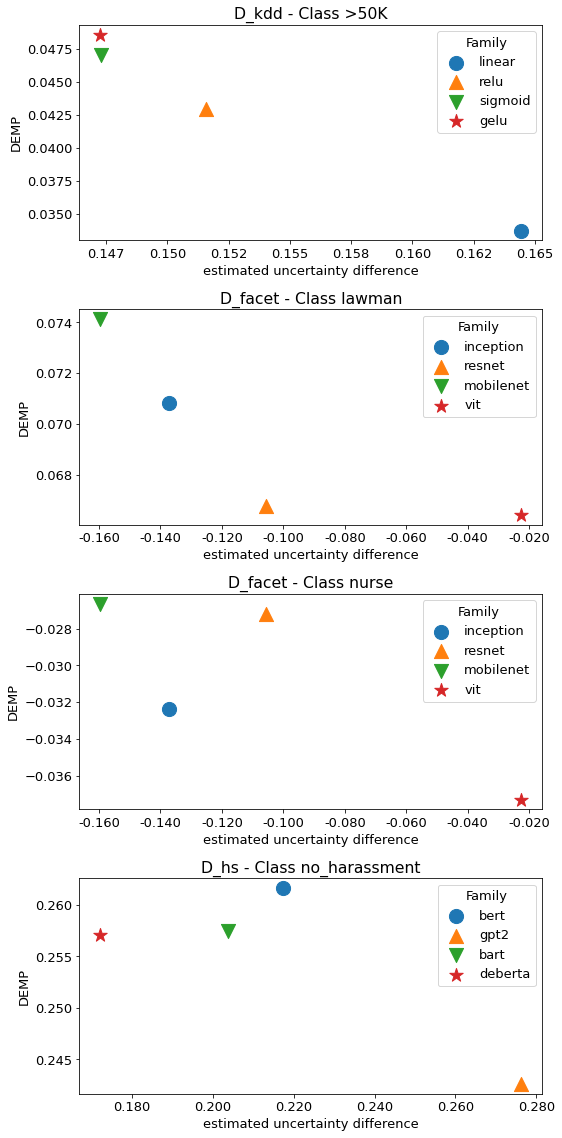

In [15]:
plt.rcParams.update({'font.size': 13})

# Create a figure and subplots
fig, axes = plt.subplots(4, 1, figsize=(8, 16))

def format_func(value, tick_number):
    return f'{value:.3f}'

for i, r in enumerate(results_dict):
    results_retrieved = results_dict[r]

    for j in range(len(results_retrieved)):
        demp = results_retrieved.iloc[j, 6]
        difference = results_retrieved.iloc[j,2]
        family = results_retrieved.iloc[j,0]
        
        axes[i].scatter([difference], 
                    [sum(demp)/2],
                    marker=markers[j], s=200, label=family)

    # Add title and labels to the first subplot
    axes[i].set_title(f'{r}')
    axes[i].set_xlabel('estimated uncertainty difference')
    axes[i].set_ylabel(f'DEMP')
    axes[i].legend(title='Family')
    axes[i].xaxis.set_major_formatter(FuncFormatter(format_func))
plt.tight_layout()
plt.savefig('demp_vs_uncertainty.pdf')

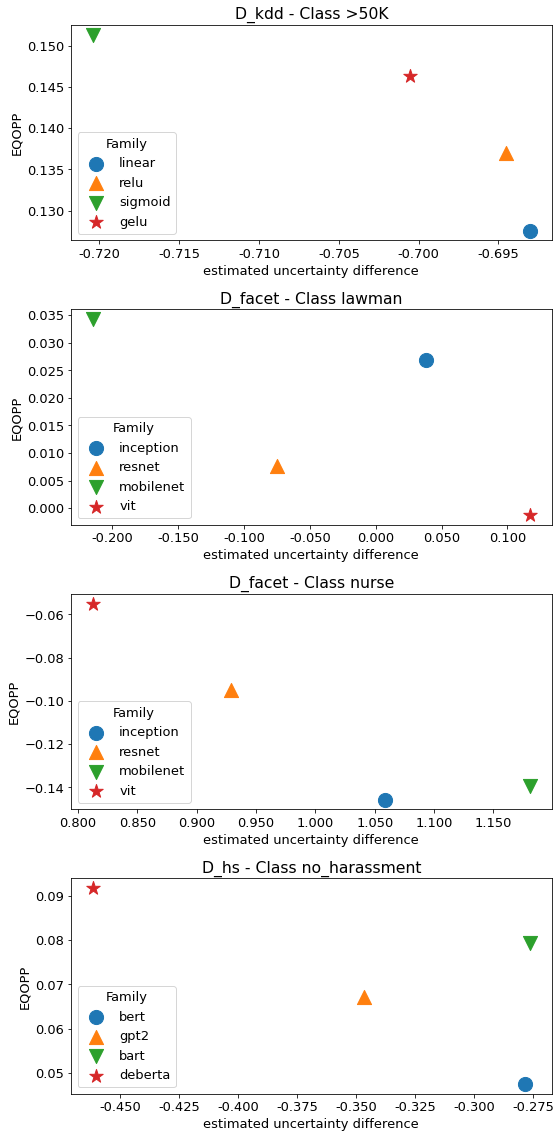

In [25]:
plt.rcParams.update({'font.size': 13})

# Create a figure and subplots
fig, axes = plt.subplots(4, 1, figsize=(8, 16))

def format_func(value, tick_number):
    return f'{value:.3f}'

for i, r in enumerate(results_dict):
    results_retrieved = results_dict[r]

    for j in range(len(results_retrieved)):
        eqopp = results_retrieved.iloc[j, 7]
        difference = results_retrieved.iloc[j,3]
        family = results_retrieved.iloc[j,0]
        
        axes[i].scatter([difference], 
                    [sum(eqopp)/2],
                    marker=markers[j], s=200, label=family)

    # Add title and labels to the first subplot
    axes[i].set_title(f'{r}')
    axes[i].set_xlabel('estimated uncertainty difference')
    axes[i].set_ylabel(f'EQOPP')
    axes[i].legend(title='Family', loc='lower left')
    axes[i].xaxis.set_major_formatter(FuncFormatter(format_func))
plt.tight_layout()
plt.savefig('eqopp_vs_uncertainty.pdf')

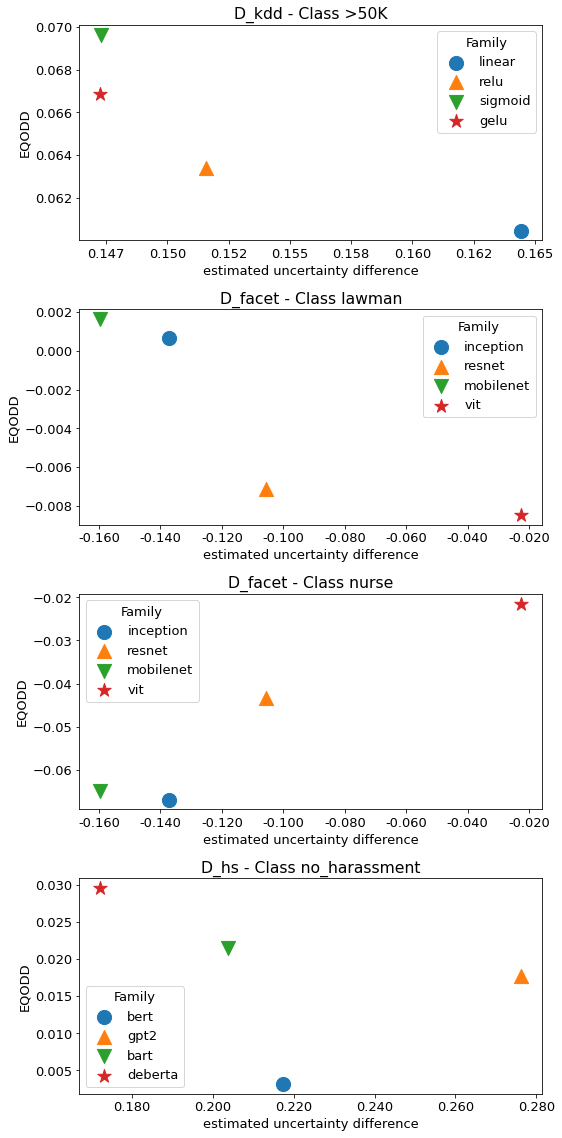

In [20]:
plt.rcParams.update({'font.size': 13})

# Create a figure and subplots
fig, axes = plt.subplots(4, 1, figsize=(8, 16))

def format_func(value, tick_number):
    return f'{value:.3f}'

for i, r in enumerate(results_dict):
    results_retrieved = results_dict[r]

    for j in range(len(results_retrieved)):
        eqodd = results_retrieved.iloc[j, 8]
        difference = results_retrieved.iloc[j,2]
        family = results_retrieved.iloc[j,0]
        
        axes[i].scatter([difference], 
                    [sum(eqodd)/2],
                    marker=markers[j], s=200, label=family)

    # Add title and labels to the first subplot
    axes[i].set_title(f'{r}')
    axes[i].set_xlabel('estimated uncertainty difference')
    axes[i].set_ylabel(f'EQODD')
    axes[i].legend(title='Family')
    axes[i].xaxis.set_major_formatter(FuncFormatter(format_func))
plt.tight_layout()
plt.savefig('eqopp_vs_uncertainty.pdf')

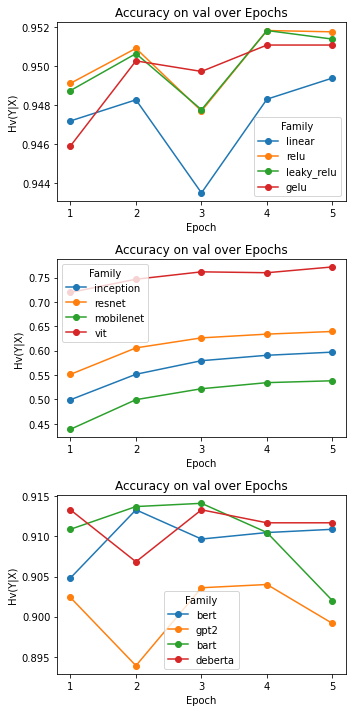

In [48]:
import matplotlib.pyplot as plt

skip = []

# Create a figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(5, 10))

for i, p in enumerate(metrics):
    metric_retrieved = metrics[p]
    family_retrieved = families[p]
    label_retrieved = labels[p]

    for family in family_retrieved:
        # if family =='linear': continue
        family_data = metric_retrieved[(metric_retrieved['model'] == family_retrieved[family])]
        
        # Plot the data on the first subplot
        axes[i].plot(family_data['epoch'].astype(str).to_list(), 
                    family_data[f'accuracy_val'].to_list(),
                    marker='o', label=family)

    # Add title and labels to the first subplot
    axes[i].set_title(f'Accuracy on val over Epochs')
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel(f'Hv(Y|X)')
    axes[i].legend(title='Family')
    # axes[i].ticklabel_format(useOffset=False, style='plain', axis='x')
plt.tight_layout()